In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import time

from src.model import *

In [4]:
SPECTRA_DIR = 'Bruker_Alpha_ZnSe/*'

AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF/')

spectra_df = load_spectra_df(SPECTRA_DIR, AFSIS_PATH)


In [3]:
wet_chem_df = pd.read_csv('afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv')
wet_chem_df.head()

,SSN,Public,EC,ExAc,ExBas,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI
0,icr006475,True,0.053,2.56,2.744241,1095.0,0.3337,207.1,1.3150,153.70,306.30,89.5,9.266,42.71,4.495,18.960,2.825,4.682,67.052495
1,icr006586,True,0.193,0.59,16.797753,1165.0,0.7899,1665.0,2.8140,126.80,1186.00,636.7,254.700,40.83,12.510,13.600,1.952,7.062,30.420552
2,icr007929,True,0.305,0.19,16.503619,727.6,0.6142,2518.0,0.2496,260.40,72.57,428.5,35.820,42.94,21.090,14.810,2.742,7.114,60.506163
3,icr008008,True,0.053,0.48,6.302775,1458.0,0.3603,734.3,1.3690,134.10,274.60,222.5,29.110,20.73,109.200,11.400,0.980,5.650,51.470143
4,icr010198,True,0.032,1.05,2.390303,2166.0,0.0100,261.8,1.6860,97.49,91.76,76.5,375.200,49.31,3.958,5.281,1.258,5.501,247.626533


In [5]:
wet_chem_df.columns

Index(['SSN', 'Public', 'EC', 'ExAc', 'ExBas', 'M3 Al', 'M3 B', 'M3 Ca',
       'M3 Cu', 'M3 Fe', 'M3 K', 'M3 Mg', 'M3 Mn', 'M3 Na', 'M3 P', 'M3 S',
       'M3 Zn', 'PH', 'PSI'],
      dtype='object')

In [6]:
WET_CHEM_PATH = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
elements = ['EC', 'M3 Ca', 'M3 K', 'M3 Mg', 'M3 P', 'PH']
columns_to_load = elements + ['SSN']


wet_chem_df = pd.read_csv(WET_CHEM_PATH, index_col='SSN', usecols=columns_to_load)

In [7]:
data_df = spectra_df.merge(wet_chem_df, left_index=True, right_index=True)


In [8]:
contains_nan = data_df.isnull().values.sum()
contains_nan

0

In [9]:
data_df

,3996.481,3994.442,3992.403,3990.364,3988.325,3986.287,3984.248,3982.209,3980.170,3978.131,...,505.932,503.893,501.854,499.815,EC,M3 Ca,M3 K,M3 Mg,M3 P,PH
icr049735,1.275778,1.276300,1.276919,1.277572,1.278203,1.278794,1.279364,1.279938,1.280521,1.281070,...,2.126014,2.171554,2.245084,0.0,3.120,1100.00,1440.000,2250.000,20.100,5.280
icr033851,1.324029,1.324736,1.325298,1.325736,1.326122,1.326528,1.327007,1.327582,1.328243,1.328935,...,2.455884,2.357239,2.227021,0.0,0.381,4898.32,1311.000,1068.000,3.200,7.867
icr068419,1.104323,1.104589,1.104893,1.105213,1.105524,1.105832,1.106162,1.106528,1.106912,1.107285,...,1.875618,1.824968,1.771411,0.0,0.072,589.00,54.500,60.200,7.590,5.490
icr010078,1.295586,1.295915,1.296322,1.296894,1.297673,1.298575,1.299413,1.300009,1.300309,1.300415,...,2.292656,2.347505,2.379426,0.0,0.034,466.20,71.800,106.500,11.180,5.642
icr075696,1.203163,1.203335,1.203458,1.203573,1.203720,1.203919,1.204157,1.204406,1.204634,1.204820,...,1.771046,1.727975,1.690061,0.0,0.037,389.00,60.800,46.300,5.670,6.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr049317,1.198862,1.199222,1.199476,1.199680,1.199906,1.200207,1.200609,1.201121,1.201734,1.202397,...,2.025850,2.000269,2.006839,0.0,0.053,392.00,49.000,73.700,7.710,6.500
icr030368,1.097860,1.098249,1.098577,1.098889,1.099265,1.099754,1.100335,1.100928,1.101452,1.101865,...,2.553873,2.555164,2.403089,0.0,0.165,33130.00,55.360,558.000,0.554,8.516
icr033545,1.281436,1.281907,1.282512,1.283234,1.284003,1.284743,1.285398,1.285948,1.286400,1.286798,...,2.148368,2.134542,2.136039,0.0,0.281,10888.30,1239.000,607.000,11.523,8.544
icr075607,1.076717,1.077119,1.077493,1.077850,1.078198,1.078533,1.078844,1.079139,1.079434,1.079727,...,1.848691,1.814768,1.789978,0.0,0.056,324.00,78.400,60.800,55.000,6.230


In [10]:
y = data_df[elements]
y

,EC,M3 Ca,M3 K,M3 Mg,M3 P,PH
icr049735,3.120,1100.00,1440.000,2250.000,20.100,5.280
icr033851,0.381,4898.32,1311.000,1068.000,3.200,7.867
icr068419,0.072,589.00,54.500,60.200,7.590,5.490
icr010078,0.034,466.20,71.800,106.500,11.180,5.642
icr075696,0.037,389.00,60.800,46.300,5.670,6.430
...,...,...,...,...,...,...
icr049317,0.053,392.00,49.000,73.700,7.710,6.500
icr030368,0.165,33130.00,55.360,558.000,0.554,8.516
icr033545,0.281,10888.30,1239.000,607.000,11.523,8.544
icr075607,0.056,324.00,78.400,60.800,55.000,6.230


In [11]:
X = pd.DataFrame.drop(data_df, columns=elements)
X_columns = X.columns
X

,3996.481,3994.442,3992.403,3990.364,3988.325,3986.287,3984.248,3982.209,3980.170,3978.131,...,518.165,516.126,514.087,512.048,510.009,507.971,505.932,503.893,501.854,499.815
icr049735,1.275778,1.276300,1.276919,1.277572,1.278203,1.278794,1.279364,1.279938,1.280521,1.281070,...,2.079350,2.087986,2.096235,2.100533,2.101763,2.106689,2.126014,2.171554,2.245084,0.0
icr033851,1.324029,1.324736,1.325298,1.325736,1.326122,1.326528,1.327007,1.327582,1.328243,1.328935,...,2.318268,2.339609,2.371755,2.415174,2.461550,2.487126,2.455884,2.357239,2.227021,0.0
icr068419,1.104323,1.104589,1.104893,1.105213,1.105524,1.105832,1.106162,1.106528,1.106912,1.107285,...,2.018550,2.016024,2.004006,1.983190,1.955027,1.919380,1.875618,1.824968,1.771411,0.0
icr010078,1.295586,1.295915,1.296322,1.296894,1.297673,1.298575,1.299413,1.300009,1.300309,1.300415,...,2.418777,2.408200,2.368371,2.317646,2.278627,2.267562,2.292656,2.347505,2.379426,0.0
icr075696,1.203163,1.203335,1.203458,1.203573,1.203720,1.203919,1.204157,1.204406,1.204634,1.204820,...,2.124686,2.074326,2.011837,1.943999,1.878379,1.820384,1.771046,1.727975,1.690061,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr049317,1.198862,1.199222,1.199476,1.199680,1.199906,1.200207,1.200609,1.201121,1.201734,1.202397,...,2.307918,2.281187,2.241750,2.191782,2.133888,2.074676,2.025850,2.000269,2.006839,0.0
icr030368,1.097860,1.098249,1.098577,1.098889,1.099265,1.099754,1.100335,1.100928,1.101452,1.101865,...,2.418012,2.420325,2.428531,2.433298,2.440590,2.477043,2.553873,2.555164,2.403089,0.0
icr033545,1.281436,1.281907,1.282512,1.283234,1.284003,1.284743,1.285398,1.285948,1.286400,1.286798,...,2.215969,2.198260,2.188680,2.184280,2.178890,2.166398,2.148368,2.134542,2.136039,0.0
icr075607,1.076717,1.077119,1.077493,1.077850,1.078198,1.078533,1.078844,1.079139,1.079434,1.079727,...,2.078563,2.053258,2.015923,1.972302,1.928074,1.886646,1.848691,1.814768,1.789978,0.0


In [12]:
%%time
y = np.log1p(y)

CPU times: user 1.45 ms, sys: 0 ns, total: 1.45 ms
Wall time: 820 µs


In [13]:
X = np.apply_along_axis(np.gradient, 1, X)

In [14]:
%%time
X_train, X_validate, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CPU times: user 5.35 ms, sys: 7.96 ms, total: 13.3 ms
Wall time: 12.7 ms


In [15]:
columns = elements

In [16]:
column_vals = []
for val in X_columns:
    column_vals.append(float(val))

Training model for EC.
1226 samples available.
CV r^2 score: 0.216
EC RMSE percentage = 1.2169834929986518


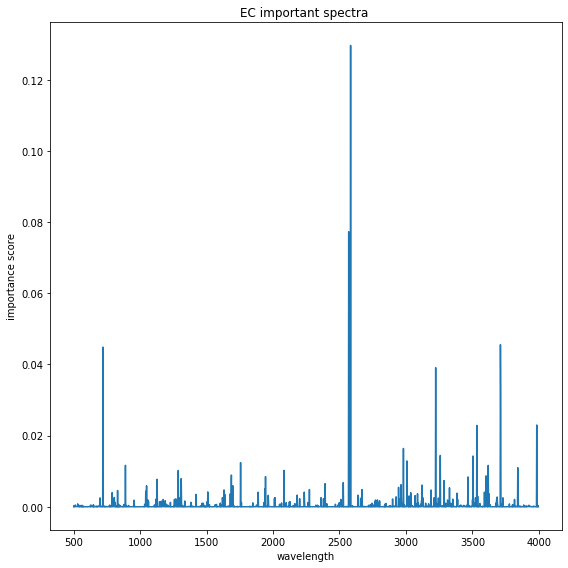

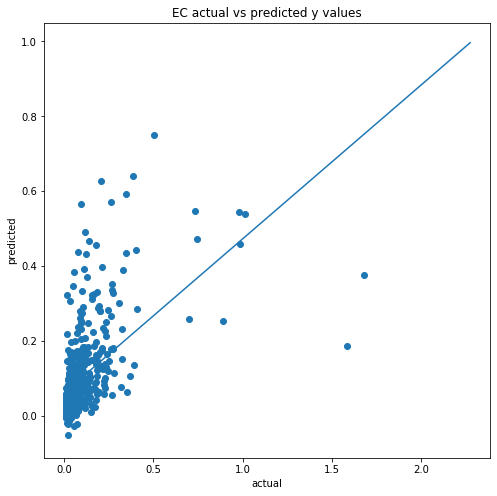

Training model for M3 Ca.
1226 samples available.
CV r^2 score: 0.836
M3 Ca RMSE percentage = 0.08123418267132665


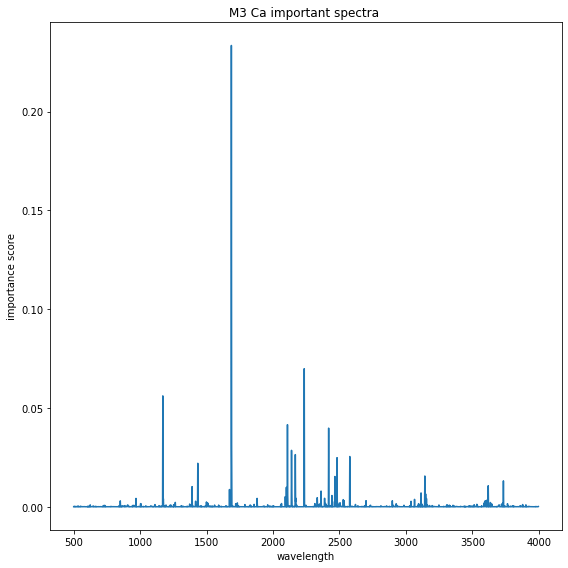

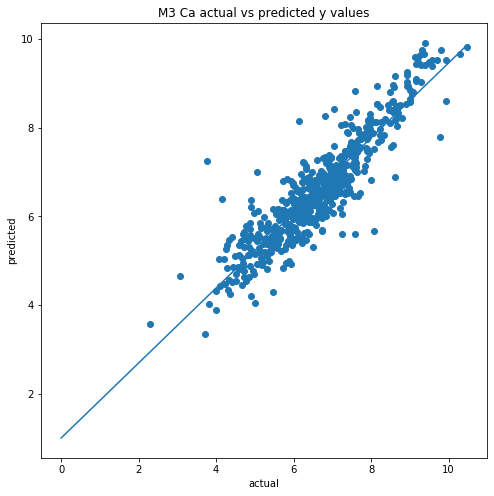

Training model for M3 K.
1226 samples available.
CV r^2 score: 0.576
M3 K RMSE percentage = 0.1306352386826578


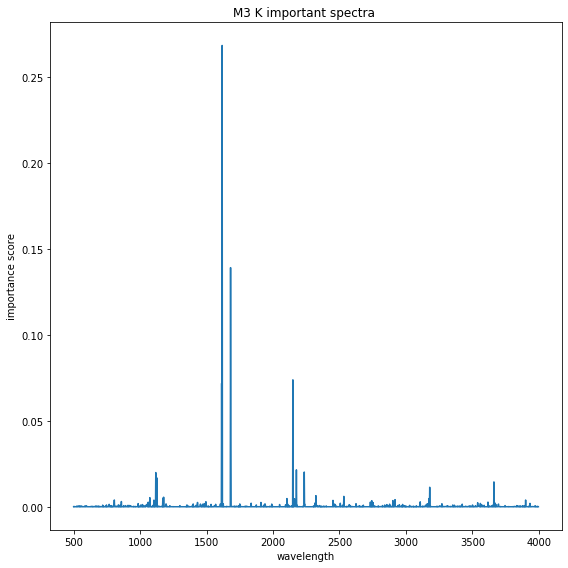

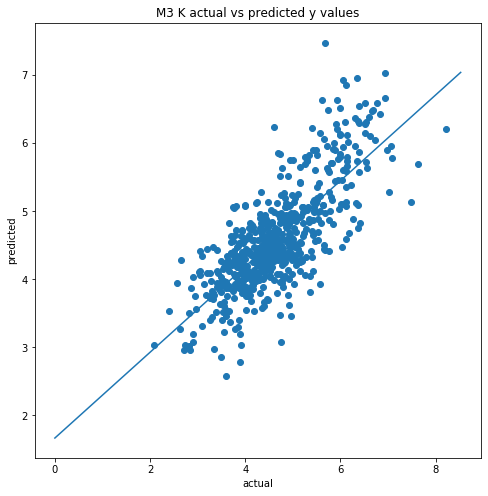

Training model for M3 Mg.
1226 samples available.
CV r^2 score: 0.823
M3 Mg RMSE percentage = 0.08564821508165994


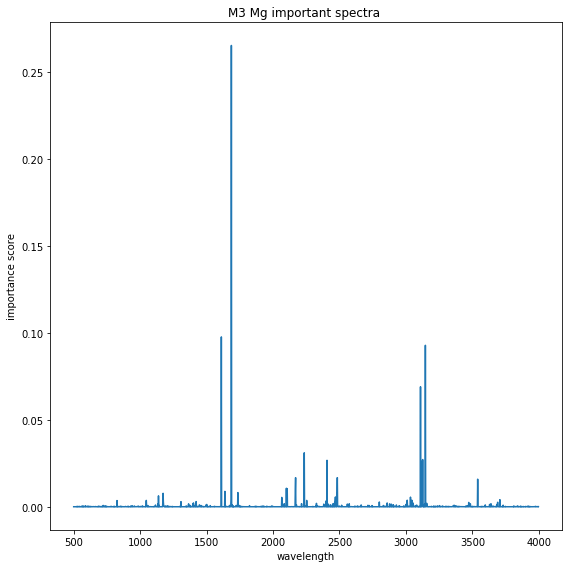

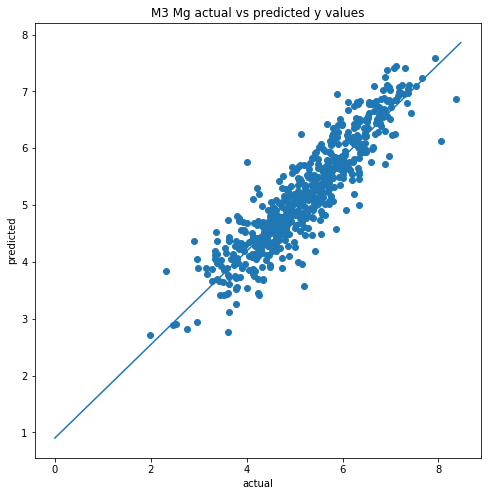

Training model for M3 P.
1226 samples available.
CV r^2 score: 0.300
M3 P RMSE percentage = 0.3787192643175131


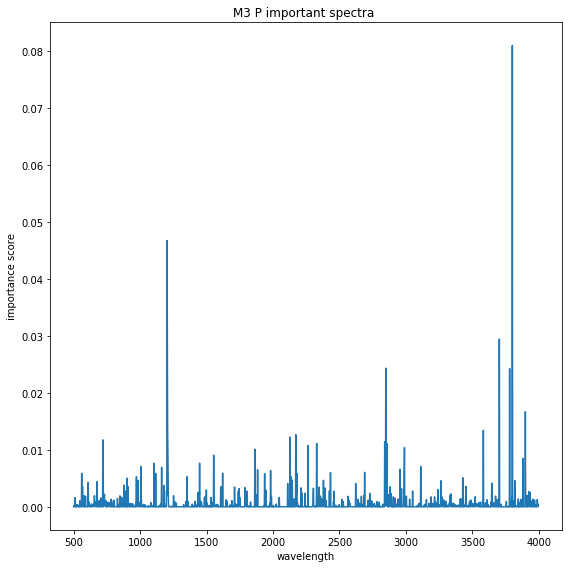

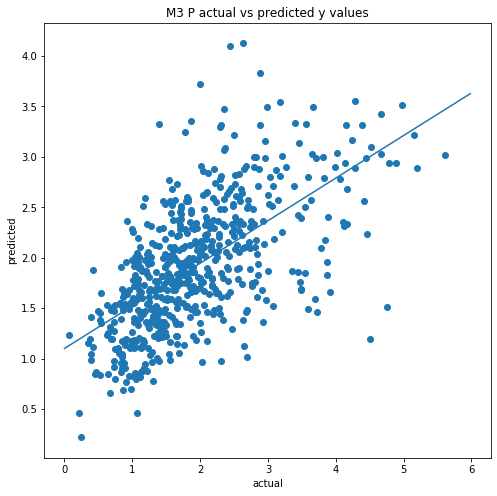

Training model for PH.
1226 samples available.
CV r^2 score: 0.768
PH RMSE percentage = 0.036654935697255774


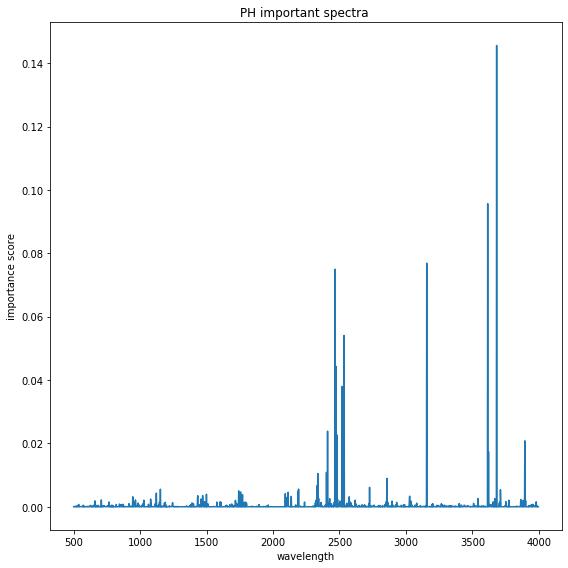

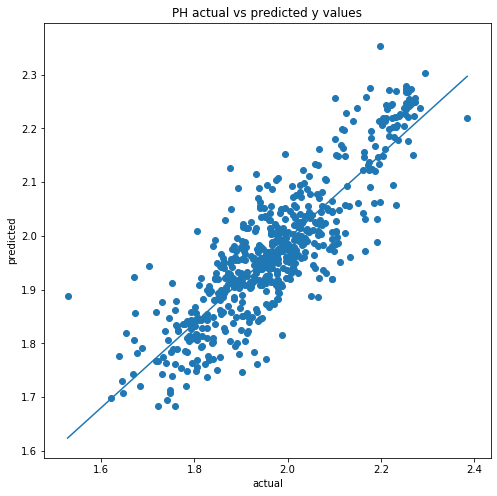

CPU times: user 34min 56s, sys: 985 ms, total: 34min 57s
Wall time: 34min 55s


In [17]:
%%time
models = []
for target in columns:
    #set the target value of interest
    Y_COLUMN = target
    
    #initialize the vanilla xgboost model
    model, r_squared = basic_xgboost3(X_train, y_train[Y_COLUMN])
    
    #fit and predict it for the target variable
    model.fit(X_train, y_train[Y_COLUMN])
    yhat = model.predict(X_validate)
    
    #evaluate results with root mean square error percentage
    rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
    _mean = y[Y_COLUMN].mean()
    rmsep = rmse / _mean
    print(f'{Y_COLUMN} RMSE percentage = {rmsep}')
    
    #plot the feature importance
    feature_importance = model.feature_importances_
    
    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(column_vals, feature_importance)
    #plt.xticks(feature_importance, , rotation='vertical')
    plt.xlabel('wavelength')
    plt.ylabel('importance score')
    plt.title(f'{Y_COLUMN} important spectra ')
    plt.tight_layout()
    plt.show()
    
    #plot the predicted to true
    fig, ax = plt.subplots(figsize=(8,8))
    plt.scatter(y_test[Y_COLUMN], yhat)
    plt.title(f'{Y_COLUMN} actual vs predicted y values')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    
    #plot r squared
    plt.plot(np.unique(y[Y_COLUMN]), np.poly1d(np.polyfit(y_test[Y_COLUMN], yhat, 1))(np.unique(y[Y_COLUMN])))
    plt.show()
    